## Medical personal cost 


<br>

- the objective is to predict the charges with certain variables, provided to know about the cost and other variables through statistical analysis
<br>


In [1]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\dev\\Desktop\\personal projects\\medical cost personal project\\insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Work plan :
</br>

- create new columns for age, bmi and charges
- convert children into string from int
- seperate two different df for train and test

In [5]:
def age(x):
    if x < 0:
        return "invalid"
    elif x < 13:
        return "kids"
    elif x < 20:
        return "teens"
    elif x < 40:
        return "adults"
    elif x < 60:
        return "mid age adults"
    else:
        return "senior adults"

In [6]:
age(1)

'kids'

In [7]:
# this takes individual data from the column.
l = []

for i in range(0, len(df["age"])):
    x = df.iloc[i].age
    y = age(x)
    l.append(y)

In [8]:
df["age_cat"] = l

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_cat
0,19,female,27.900,0,yes,southwest,16884.92400,teens
1,18,male,33.770,1,no,southeast,1725.55230,teens
2,28,male,33.000,3,no,southeast,4449.46200,adults
3,33,male,22.705,0,no,northwest,21984.47061,adults
4,32,male,28.880,0,no,northwest,3866.85520,adults


In [10]:
df["age_cat"].value_counts()

mid age adults    550
adults            537
teens             137
senior adults     114
Name: age_cat, dtype: int64

In [11]:
def bmi(x):
    if x < 19:
        return "underweight"
    elif x < 25:
        return "healthy"
    elif x < 30 :
        return "overweight"
    elif x < 40 :
        return "obese"
    elif x >= 40 :
        return "severely obese"
    else :
        return "invalid"
        

In [12]:
df["bmi_cat"] = df["bmi"].apply(bmi)

In [13]:
# changing children as int to str

df["children"] = df["children"].astype("str")

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,bmi_cat
0,19,female,27.900,0,yes,southwest,16884.92400,teens,overweight
1,18,male,33.770,1,no,southeast,1725.55230,teens,obese
2,28,male,33.000,3,no,southeast,4449.46200,adults,obese
3,33,male,22.705,0,no,northwest,21984.47061,adults,healthy
4,32,male,28.880,0,no,northwest,3866.85520,adults,overweight


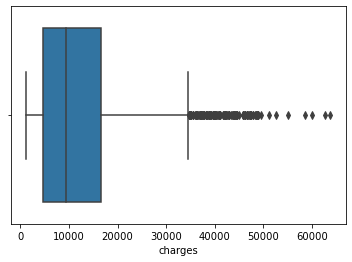

In [15]:
sns.boxplot(df["charges"])

{'whiskers': [<matplotlib.lines.Line2D at 0x147d976d250>,
 'caps': [<matplotlib.lines.Line2D at 0x147d976d910>,
 'boxes': [<matplotlib.lines.Line2D at 0x147d9760eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x147d976dfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x147d9777310>],
 'means': []}

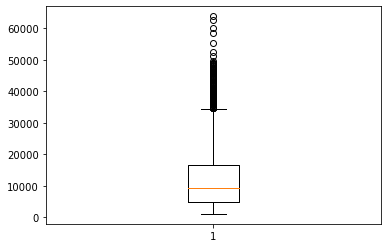

In [16]:
plt.boxplot(df["charges"])

In [17]:
# writing as excel

# df.to_excel("medical.xlsx")

### Data preparation:

- creatng dummy variables for region
- converting the columns to binary values sex, smoker
- dropping age_cat, bmi_cat
- converting children into int
- scaling variables age, bmi, children

In [18]:
df.drop(columns = ["age_cat", "bmi_cat"], inplace = True)

In [19]:
df["children"] = df["children"].astype("int64")

In [20]:
# creating copy

dfcopy = df.copy()

In [21]:

def genderconvert(x):
    return x.map({"female" : 0, "male" : 1})

def smokerconvert(x):
    return x.map({"yes" : 1, "no" : 0})

In [22]:
df["smoker"] = df["smoker"].apply(lambda x: 1 if x == "yes" else 0)
df["sex"] = df[["sex"]].apply(genderconvert)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


#### creating dummies :

In [25]:
reg = pd.get_dummies(df["region"], drop_first= True)

In [26]:
reg

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [27]:
df = pd.concat([df, reg], axis = 1)

In [28]:
df.drop(columns = ["region"], inplace = True)

In [29]:
df

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,0,0
1334,18,0,31.920,0,0,2205.98080,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,1


#### scaling variables :

In [30]:
# splitting the df into train and test before scaling
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [31]:
scl = ["age", "bmi", "children"]

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:

# scaling only the train data
scaler = MinMaxScaler()

In [34]:
df_train[scl] = scaler.fit_transform(df_train[scl])

<ipython-input-34-f1092fc9f710>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[scl] = scaler.fit_transform(df_train[scl])
C:\Users\dev\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


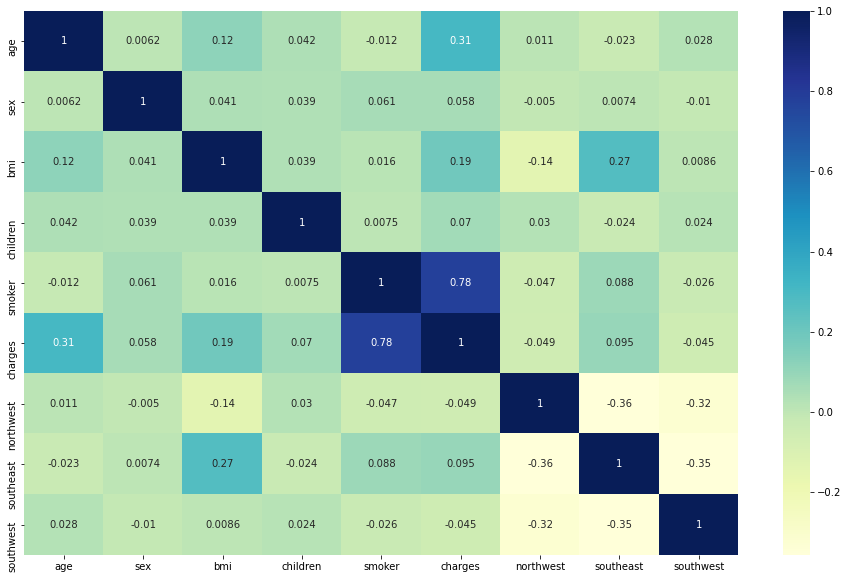

In [35]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

note: 
- age, bmi and smoker varaibles are correlated with the charges the most.

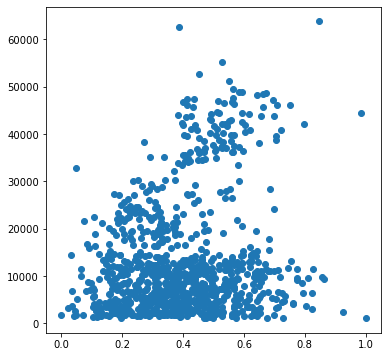

In [36]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.bmi, df_train.charges)
plt.show()

##### Dividing the datasets into dependant and independant variables

In [37]:
y_train = df_train.pop("charges")
X_train = df_train

In [38]:
X_train

,age,sex,bmi,children,smoker,northwest,southeast,southwest
966,0.717391,1,0.237692,0.4,1,1,0,0
522,0.717391,0,0.483051,0.0,0,0,0,0
155,0.565217,1,0.633844,0.0,0,1,0,0
671,0.239130,0,0.408932,0.0,0,0,0,0
1173,0.434783,1,0.357815,0.4,0,1,0,0
...,...,...,...,...,...,...,...,...
802,0.065217,1,0.170568,0.2,0,0,0,1
53,0.391304,1,0.496906,0.0,1,0,1,0
350,0.847826,0,0.194243,0.0,0,1,0,0
79,0.500000,0,0.457493,0.0,0,1,0,0


In [39]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['smoker']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [40]:
lr.params

const      8512.964143
smoker    23946.493045
dtype: float64

In [41]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     1465.
Date:                Sun, 18 Dec 2022   Prob (F-statistic):          1.60e-193
Time:                        19:02:28   Log-Likelihood:                -9688.1
No. Observations:                 936   AIC:                         1.938e+04
Df Residuals:                     934   BIC:                         1.939e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8512.9641    275.884     30.857      0.0

In [42]:
# training with other high correlated variables
# Add a constant
X_train_lm = sm.add_constant(X_train[['smoker',"age", "bmi"]])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [43]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     856.0
Date:                Sun, 18 Dec 2022   Prob (F-statistic):          3.43e-267
Time:                        19:02:28   Log-Likelihood:                -9510.3
No. Observations:                 936   AIC:                         1.903e+04
Df Residuals:                     932   BIC:                         1.905e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1171.8246    594.866     -1.970      0.0

In [44]:
# adding all the variables
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [45]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     326.2
Date:                Sun, 18 Dec 2022   Prob (F-statistic):          2.08e-263
Time:                        19:02:28   Log-Likelihood:                -9503.0
No. Observations:                 936   AIC:                         1.902e+04
Df Residuals:                     927   BIC:                         1.907e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -955.2075    710.405     -1.345      0.1

In [46]:
# removing the high p value variables
# Add a constant
X_train_lm = sm.add_constant(X_train.drop(columns = ["northwest", "southeast"]))

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [47]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     434.0
Date:                Sun, 18 Dec 2022   Prob (F-statistic):          1.93e-265
Time:                        19:02:29   Log-Likelihood:                -9504.4
No. Observations:                 936   AIC:                         1.902e+04
Df Residuals:                     929   BIC:                         1.906e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1386.2828    644.926     -2.150      0.0

In [48]:
# removing the high p value variables
# Add a constant
X_train_lm = sm.add_constant(X_train.drop(columns = ["northwest", "southeast", "sex"]))

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [49]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     521.4
Date:                Sun, 18 Dec 2022   Prob (F-statistic):          8.06e-267
Time:                        19:02:29   Log-Likelihood:                -9504.4
No. Observations:                 936   AIC:                         1.902e+04
Df Residuals:                     930   BIC:                         1.905e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1382.1606    621.017     -2.226      0.0

### VIF

In [50]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
t = X_train.drop(columns = ["northwest", "southeast", "sex"])
col = list(t.columns)

In [52]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,bmi,5.08
0,age,2.93
6,southeast,2.21
1,sex,1.88
7,southwest,1.82
3,children,1.78
5,northwest,1.71
4,smoker,1.24


Vif shows that implemented variables are effcient in the analysis. Bmi is a strong value that even though it has 5.08 vif, it has less p-value

#### Residual analysis

In [53]:
y_train_charges = lr.predict(X_train_lm)

Text(0.5, 0, 'Errors')

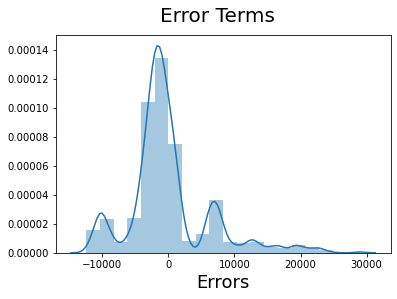

In [54]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_charges), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [55]:
col = list(X_train_lm.columns)

In [56]:
col.remove("const")
col.append("charges")

In [57]:
# taking the same variables as the train data set

df_test = df_test[col]
df_test[["age", "bmi", "children"]] = scaler.transform(df_test[["age", "bmi", "children"]])

In [58]:
df_test

,age,bmi,children,smoker,southwest,charges
12,0.108696,0.496099,0.0,0,1,1826.84300
306,0.217391,0.310465,0.4,0,1,20177.67113
318,0.565217,0.314366,0.0,0,0,7421.19455
815,0.043478,0.417003,0.0,0,0,1877.92940
157,0.000000,0.247915,0.0,1,0,15518.18025
...,...,...,...,...,...,...
710,0.000000,0.517622,0.2,0,0,1727.54000
1005,0.239130,0.424267,0.4,0,0,4433.38770
389,0.130435,0.383374,0.6,0,0,4618.07990
923,0.347826,0.534167,0.0,0,0,4320.41085


##### dividing the dataset into X_test and y_test

In [59]:
y_test= df_test.pop("charges")
X_test= df_test

In [60]:
# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test)

In [61]:
# Making predictions using the fourth model

y_pred_m = lr.predict(X_test_m)

Text(0, 0.5, 'y_pred')

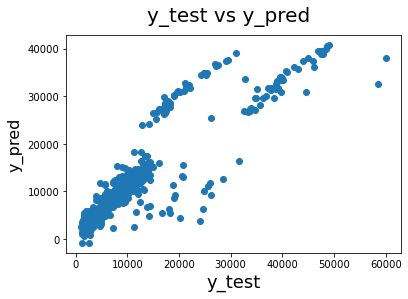

In [62]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

Text(0.5, 0, 'Errors')

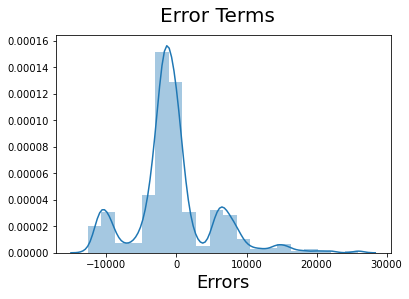

In [63]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred_m), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [64]:
from sklearn.metrics import r2_score


In [65]:
# checking r square score for the prediction dataset

r2 = r2_score(y_true = y_test, y_pred = y_pred_m)
r2

0.7769851707884199

In [66]:
# checking r square score forthe training dataset

r2 = r2_score(y_true = y_train, y_pred = y_train_charges)
r2

0.7370707410724413

#### final model:


In [67]:
# As we saw we can try to build a better model by removing southwest as a varaible. 

# removing the region variable
# Add a constant
X_train_lm = sm.add_constant(X_train.drop(columns = ["northwest", "southeast", "sex", "southwest"]))

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()


In [68]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     648.2
Date:                Sun, 18 Dec 2022   Prob (F-statistic):          2.76e-267
Time:                        19:02:41   Log-Likelihood:                -9506.6
No. Observations:                 936   AIC:                         1.902e+04
Df Residuals:                     931   BIC:                         1.905e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1600.8593    613.482     -2.609      0.0

#### prediction

In [73]:
X_test.drop(columns=["southwest"], inplace= True)

In [74]:
X_test_m = sm.add_constant(X_test)

In [75]:
y_pred_m = lr.predict(X_test_m)

Text(0, 0.5, 'y_pred')

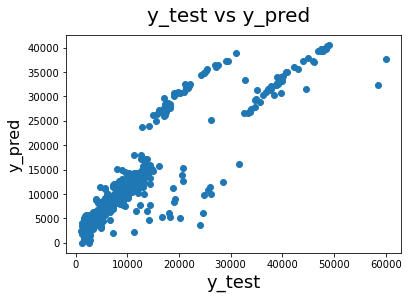

In [76]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [78]:
# checking r square score for the prediction dataset

r2 = r2_score(y_true = y_test, y_pred = y_pred_m)
r2

0.7801257218275263

This model has a better R square score than the previous one. 